<a href="https://colab.research.google.com/github/Tiendung0101/Tien-Dung_Banking-Transaction/blob/main/Transaction_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###03. Data processing and dealing with data


>**Requirements**
> - Remove dữ liệu duplicate; Remove/phân tách riêng dữ liệu khuyết thiếu, thêm/bớt biến
> - Phân loại các biến dữ liệu: quantitative & qualitative (các biến time-series)
> - Phân tích đơn biến (univariate analysis)
> - Phân tích đa biến (multivariate analysis)

#### About data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Banking Transaction.csv to Banking Transaction.csv


In [ ]:
import pandas as pd
df0 = pd.read_csv('Banking Transaction.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1048567 non-null  object 
 1   customer_id           1048567 non-null  object 
 2   customer_dob          1045170 non-null  object 
 3   cust_gender           1047467 non-null  object 
 4   cust_location         1048416 non-null  object 
 5   cust_account_balance  1046198 non-null  float64
 6   transaction_date      1048567 non-null  object 
 7   transaction_time      1048567 non-null  int64  
 8   transaction_amount    1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


> **Note**
>
> **df0** = bảng gốc
>
> **df1** = bảng sau khi xử lý duplicated (= df0 do không có dup)
>
> **df2** = bảng xử lý và phân tích data
> - chuẩn hóa format của các cột datetime *(cus_dob, transaction_time)*
> - đánh giá chất lượng data
> - phân tích % missing value các cột
>
> **df3** = ...

####Check duplicates

In [ ]:
dup = df0[df0.duplicated()]
dup.info()

#ko có dup

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        0 non-null      object 
 1   customer_id           0 non-null      object 
 2   customer_dob          0 non-null      object 
 3   cust_gender           0 non-null      object 
 4   cust_location         0 non-null      object 
 5   cust_account_balance  0 non-null      float64
 6   transaction_date      0 non-null      object 
 7   transaction_time      0 non-null      int64  
 8   transaction_amount    0 non-null      float64
dtypes: float64(2), int64(1), object(6)
memory usage: 0.0+ bytes


In [ ]:
df1 = df0.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1048567 non-null  object 
 1   customer_id           1048567 non-null  object 
 2   customer_dob          1045170 non-null  object 
 3   cust_gender           1047467 non-null  object 
 4   cust_location         1048416 non-null  object 
 5   cust_account_balance  1046198 non-null  float64
 6   transaction_date      1048567 non-null  object 
 7   transaction_time      1048567 non-null  int64  
 8   transaction_amount    1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
df1.head(20)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.00
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.50
5,T6,C1536588,8/10/1972,F,ITANAGAR,53609.20,2/8/2016,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/2016,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/2016,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/2016,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/2016,192446,289.11


#### Data processing and analysis

In [ ]:
# Phân loại các biến quantitative và qualitative

df1['transaction_time'] = df1['transaction_time'].astype('object')
quantitative_vars = df1.select_dtypes(include=['number']).columns.tolist()
qualitative_vars = df1.select_dtypes(exclude=['number']).columns.tolist()

print("Quantitative variables:", quantitative_vars)
print("Qualitative variables:", qualitative_vars)

Quantitative variables: ['cust_account_balance', 'transaction_amount']
Qualitative variables: ['transaction_id', 'customer_id', 'customer_dob', 'cust_gender', 'cust_location', 'transaction_date', 'transaction_time']


In [ ]:
# Để xử lí và phân tích data
df2 = df1.copy()

In [ ]:
# Nhi: chuẩn hóa format các cột datetime

from datetime import datetime

def convert_date_format(date_str):
  if isinstance(date_str, float):
    date_str = str(date_str)
  if date_str is None:
    date_str = ''

  for fmt in ('%d/%m/%y', '%d/%m/%Y', '%m/%d/%Y', '%d/%m/%y'):
    try:
      date_obj = datetime.strptime(date_str, fmt)
      return date_obj.strftime('%d/%m/%Y')
    except ValueError:
      continue
  return None

df2['customer_dob'] = df2['customer_dob'].apply(convert_date_format)
df2['transaction_date'] = df2['transaction_date'].apply(convert_date_format)

In [ ]:
df2.head(31)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11


In [ ]:
# Dũng: sửa customer_dob có năm sinh > 2016 thì - 100 năm

def adjust_year(date_str):
  if date_str is not None:
    day, month, year = date_str.split('/')
    if int(year) > 2016:
      year = str(int(year) - 100)
      return '/'.join([day, month, year])
  return date_str

df2['customer_dob'] = df2['customer_dob'].apply(adjust_year)

In [ ]:
df2.head(31)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11


In [ ]:
# Dũng: chuyển dữ liệu những người đến từ tương lai và 01/01/1800 thành nan

def handle_future_dates(date_str):
  if date_str is None:
    return None
  date_obj = datetime.strptime(date_str, '%d/%m/%Y')
  if date_obj > datetime.now():
    return None
  elif date_str == '01/01/1800':
    return None
  else:
    return date_str

df2['customer_dob'] = df2['customer_dob'].apply(handle_future_dates)

In [ ]:
df2.head(31)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11


In [ ]:
print(df2.notnull().sum())

transaction_id          1048567
customer_id             1048567
customer_dob             987831
cust_gender             1047467
cust_location           1048416
cust_account_balance    1046198
transaction_date        1048567
transaction_time        1048567
transaction_amount      1048567
dtype: int64


In [ ]:
print(df2.isnull().sum())

transaction_id              0
customer_id                 0
customer_dob            60736
cust_gender              1100
cust_location             151
cust_account_balance     2369
transaction_date            0
transaction_time            0
transaction_amount          0
dtype: int64


In [ ]:
# prompt: calculate min, max, quartile of quantitative data of df2
pd.options.display.float_format = '{:.2f}'.format

df2.describe()

,cust_account_balance,transaction_amount
count,1046198.00,1048567.00
mean,115403.54,1574.34
std,846485.38,6574.74
min,0.00,0.00
25%,4721.76,161.00
50%,16792.18,459.03
75%,57657.36,1200.00
max,115035495.10,1560034.99


In [ ]:
# Dũng:
missing_percentage_quantitative = df2[quantitative_vars].isnull().sum() / len(df2) * 100

print(missing_percentage_quantitative)

cust_account_balance   0.23
transaction_amount     0.00
dtype: float64


In [ ]:
df2.head(20)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11


####Xử lí dữ liệu missing values

In [ ]:
# Dũng: loại tất cả missing value trong bảng trên

df3 = df2.dropna()
df3.head(20)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985322 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        985322 non-null  object 
 1   customer_id           985322 non-null  object 
 2   customer_dob          985322 non-null  object 
 3   cust_gender           985322 non-null  object 
 4   cust_location         985322 non-null  object 
 5   cust_account_balance  985322 non-null  float64
 6   transaction_date      985322 non-null  object 
 7   transaction_time      985322 non-null  object 
 8   transaction_amount    985322 non-null  float64
dtypes: float64(2), object(7)
memory usage: 75.2+ MB


In [ ]:
# Dũng: tạo thêm cột cust_age là số tuổi của khách hàng, tính bằng cách lấy năm của transaction_date - năm của cust_dob

def calculate_age(row):
  if row['customer_dob'] is None or row['transaction_date'] is None:
    return None
  dob_year = int(row['customer_dob'].split('/')[-1])
  transaction_year = int(row['transaction_date'].split('/')[-1])
  return transaction_year - dob_year

df3['cust_age'] = df3.apply(calculate_age, axis=1)

<ipython-input-22-e5ee85d6822f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cust_age'] = df3.apply(calculate_age, axis=1)


In [ ]:
df3.head(20)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,cust_age
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00,22
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00,59
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00,20
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00,43
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50,28
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00,44
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00,24
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00,34
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00,28
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11,32


In [ ]:
# Nhi: lấy 2 chữ số đầu tiên của cột transaction_time với attributes là transaction_hours

from datetime import time

def float_to_time(time_float):

  time_int = int(time_float)

  hours = time_int // 10000
  minutes = (time_int // 100) % 100
  seconds = time_int % 100

  #return time(hours)
  return hours

# test
# time_obj = float_to_time(143227.0)
# print(time_obj)

# hour = time_obj.hour
# print(hour)


In [ ]:
df3['transaction_hour'] = df3['transaction_time'].apply(float_to_time)
df3.head(10)

<ipython-input-25-f2a6dbac30f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transaction_hour'] = df3['transaction_time'].apply(float_to_time)


,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,cust_age,transaction_hour
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00,22,14
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00,59,14
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00,20,14
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00,43,14
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50,28,18
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00,44,17
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00,24,17
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00,34,17
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00,28,19
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11,32,19


In [ ]:
# Dũng: kiểm tra xem customer_id có sự lặp lại nào không
# Có mấy khách hàng cùng ID nhưng khác ngày sinh :v có thể là dùng chung tài khoản hả c
# Kiểm tra xem customer_id có sự lặp lại nào không

# duplicate_customer_ids = df3[df3.duplicated(subset=['customer_id'], keep=False)]

# duplicate_customer_ids

### 04. Modelling & Evaluation (Option)

> - Xây dựng model
> - Giải thích các metric, đánh giá hiệu quả

#### K-means Clustering để phân tích phân khúc khách hàng

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


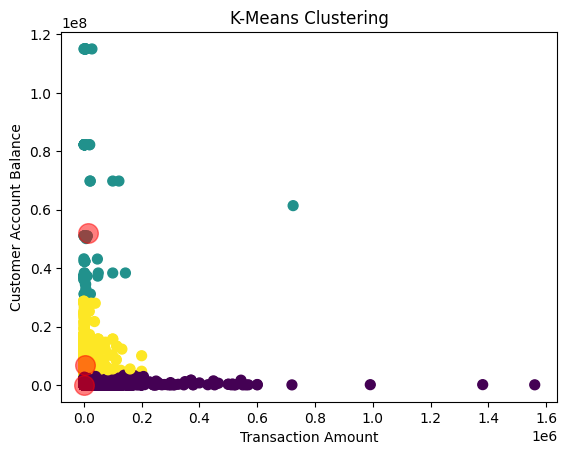

In [ ]:
# prompt: xây dựng model k-means clustering cho transaction_amount và cust_account_balance

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chọn 2 trường dữ liệu cho clustering
X = df3[['transaction_amount', 'cust_account_balance']].values

# Xác định số lượng clusters (ví dụ: 3)
num_clusters = 3

# Khởi tạo model KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Fit model với dữ liệu
kmeans.fit(X)

# Lấy nhãn của các clusters
labels = kmeans.labels_

# Lấy tọa độ của các centroids
centroids = kmeans.cluster_centers_

# Vẽ biểu đồ phân cụm
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Account Balance')
plt.title('K-Means Clustering')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chọn thuộc tính để phân nhóm
features = df3[['cust_account_balance', 'transaction_amount']]

# Tiền xử lý dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Xây dựng mô hình K-means
kmeans = KMeans(n_clusters=4)  # Thay đổi số lượng cụm nếu cần
df3['cluster'] = kmeans.fit_predict(features_scaled)

# Kiểm tra các cụm
cluster_summary = df3.groupby('cluster').agg({
    'cust_account_balance': 'mean',
    'transaction_amount': ['mean', 'sum'],
    'transaction_id': 'count'
})
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        cust_account_balance transaction_amount               transaction_id
                        mean               mean           sum          count
cluster                                                                     
0                  390955.79           45618.77  320791219.19           7032
1                   96077.59            1113.28 1088885160.96         978086
2                47003633.42            7679.43    1259426.85            164
3                 1862014.38          504266.13   20170645.26             40


<ipython-input-28-7c683d9403f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = kmeans.fit_predict(features_scaled)


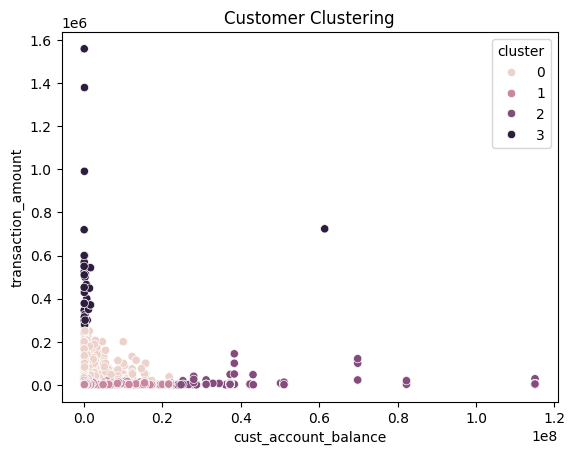

In [ ]:
sns.scatterplot(x='cust_account_balance', y='transaction_amount', hue='cluster', data=df3)
plt.title('Customer Clustering')
plt.show()

Biểu đồ này cho thấy hành vi giao dịch của 4 nhóm khách hàng:

- Cluster 0: nhóm khách hàng có số dư tài khoản rất thấp và không thực hiện giao dịch hoặc thực hiện rất ít
- cluster 1: nhóm khách hàng có số dư tài khoản từ thấp đến cao nhưng giao dịch rất ít
- cluster 3: nhóm khách hàng có số dư tài khoản và số tiền giao dịch thấp
- cluster 2: nhóm khách hàng có số dư tài khoản rất thấp đến trung bình nhưng thực hiện giao dịch với số tiền lớn

=> Chúng ta cần có những chiến dịch kích cầu tiêu dùng của các nhóm khách hàng thuộc cluster 1, 3; chiến dịch tri ân nhóm khách hàng cluster 2 để tạo loyal customer và thu hút việc giao dịch trở lại của những nhóm khách hàng thuộc cluster 0.

###05. Data Visualization


In [ ]:
df3.info()
df3.head(40)

<class 'pandas.core.frame.DataFrame'>
Index: 985322 entries, 0 to 1048566
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        985322 non-null  object 
 1   customer_id           985322 non-null  object 
 2   customer_dob          985322 non-null  object 
 3   cust_gender           985322 non-null  object 
 4   cust_location         985322 non-null  object 
 5   cust_account_balance  985322 non-null  float64
 6   transaction_date      985322 non-null  object 
 7   transaction_time      985322 non-null  object 
 8   transaction_amount    985322 non-null  float64
 9   cust_age              985322 non-null  int64  
 10  transaction_hour      985322 non-null  int64  
 11  cluster               985322 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 94.0+ MB


,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,cust_age,transaction_hour,cluster
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.00,22,14,1
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.00,59,14,0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.00,20,14,1
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.00,43,14,1
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.50,28,18,1
5,T6,C1536588,08/10/1972,F,ITANAGAR,53609.20,02/08/2016,173940,676.00,44,17,1
6,T7,C7126560,26/01/1992,F,MUMBAI,973.46,02/08/2016,173806,566.00,24,17,1
7,T8,C1220223,27/01/1982,M,MUMBAI,95075.54,02/08/2016,170537,148.00,34,17,1
8,T9,C8536061,19/04/1988,F,GURGAON,14906.96,02/08/2016,192825,833.00,28,19,1
9,T10,C6638934,22/06/1984,M,MUMBAI,4279.22,02/08/2016,192446,289.11,32,19,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap

#### Number of transactions by customer age group

<ipython-input-31-704a2e7e3db7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transactioncount_by_age_group.index, y=transactioncount_by_age_group.values, palette=colors)
<ipython-input-31-704a2e7e3db7>:16: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=transactioncount_by_age_group.index, y=transactioncount_by_age_group.values, palette=colors)


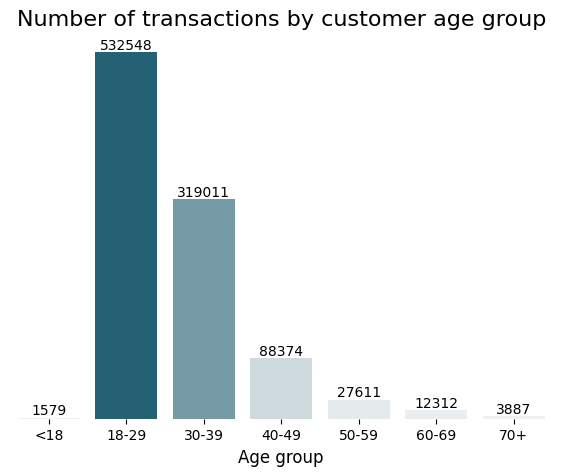

In [ ]:
# Tính số lượng giao dịch theo nhóm tuổi

#Tạo khoảng tuổi
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

age_groups = pd.cut(df3['cust_age'], bins=bins, labels=labels, right=False)
transactioncount_by_age_group = age_groups.value_counts().sort_index()

# Chỉnh màu
cmap = sns.light_palette("#176882", as_cmap=True)
norm = plt.Normalize(transactioncount_by_age_group.min(), transactioncount_by_age_group.max())
colors = cmap(norm(transactioncount_by_age_group.values))

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=transactioncount_by_age_group.index, y=transactioncount_by_age_group.values, palette=colors)

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xóa khung trục
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Xóa các dấu vết của các trục
#ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#ax.yaxis.set_tick_params(width=0)

plt.title('Number of transactions by customer age group', fontsize=16)
plt.xlabel('Age group', fontsize=12)
#plt.ylabel('Số lượng giao dịch', fontsize=14)

plt.show()


Phần lớn giao dịch nằm trong 2 nhóm tuổi từ 18-29 và từ 30-39 tuổi. Các nhóm tuổi dưới 18 và từ 40 tuổi trở lên đều có lượng giao dịch tương đối ít.
Lí do:
- Vào năm 2016, việc giao dịch ngân hàng thông qua chuyển khoản tại Ấn Độ có thể vẫn chưa phát triển, những người dùng truyền thống đã đủ tuổi sở hữu tài khoản ngân hàng (>18) vẫn chưa làm quen được với các thao tác chuyển khoản.

=> Cần thiết kế giao dịch chuyển khoản ngân hàng thuận tiện và user-friendly với người dùng hơn nhằm kích cầu những đối tượng có độ tuổi ngoài 40 sử dụng phương thức chuyển khoản nhiều hơn.

#### Number of transactions by amount

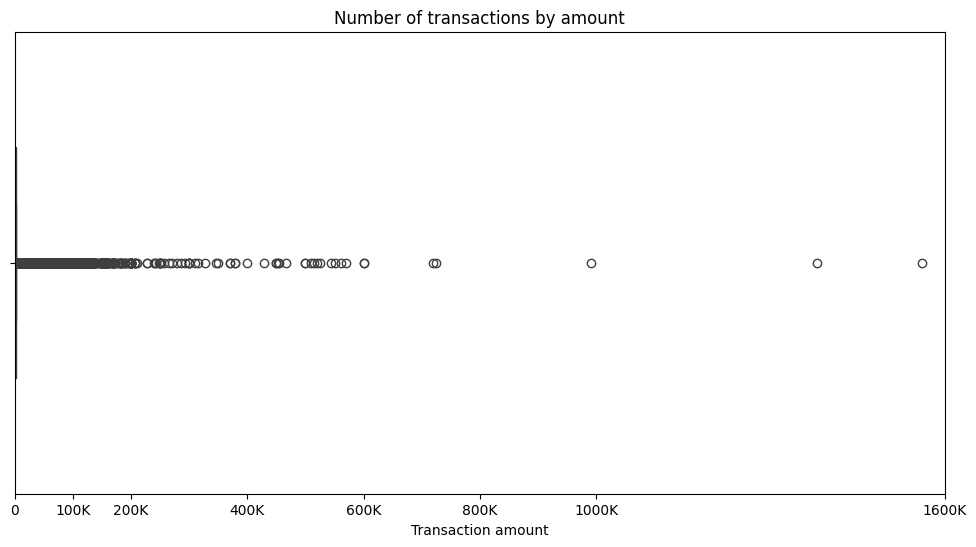

In [ ]:
# Tính số lượng giao dịch theo khoảng tiền

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df3['transaction_amount'], width=0.5)

plt.title('Number of transactions by amount')
plt.xlabel('Transaction amount')
plt.xlim(0, 1600000)

# Tinh chỉnh để hiển thị rõ số tiền trên trục x
ax.set_xticks([0, 100000, 200000, 400000, 600000, 800000, 1000000, 1600000])
ax.set_xticklabels(['0', '100K', '200K', '400K', '600K', '800K', '1000K', '1600K'])

#plt.grid(True)
plt.show()

Nhìn vào biểu đồ, mật độ giao dịch cho khoảng tiền dưới 200K INR dày đặc hơn hẳn từ 200K - 600K và thưa thớt dần đối với những khoản giao dịch > 600K.
Có 3 lí do có thể dẫn đến cho sự phân bổ này:
- Số tiền lớn khiến cho người dùng ở năm 2016 cảm thấy không đủ tin tưởng để giao dịch online so sánh với phương thức giao dịch trực tiếp bằng tiền mặt.
- Thủ tục dành cho các giao dịch lớn quá rườm rà khiến người dùng không muốn sử dụng phương thức giao dịch này.
- Phí giao dịch của các giao dịch lớn quá nhiều khiến cho người dùng không muốn chi nhiều cho các khoản phí đó.

=> Để kích cầu các giao dịch lớn, ngân hàng có thể đưa ra các chương trình ưu đãi cho người dùng có giao dịch > 600K, ví dụ giao dịch trong tháng > 600K sẽ được mở thẻ credit có hạn mức 600K với nhiều ưu đãi. Hoặc, những người có tần suất giao dịch số tiền lớn hơn 600K trong tháng sẽ được giảm phí và nâng khách hàng VIP với các ưu đãi khi sử dụng thẻ thanh toán cho các khoản giao dịch nhỏ.


#### Top 20 locations with the most customers

<ipython-input-33-8aad00e581f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_locations.index, y=top_20_locations.values, palette=colors)
<ipython-input-33-8aad00e581f5>:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=top_20_locations.index, y=top_20_locations.values, palette=colors)


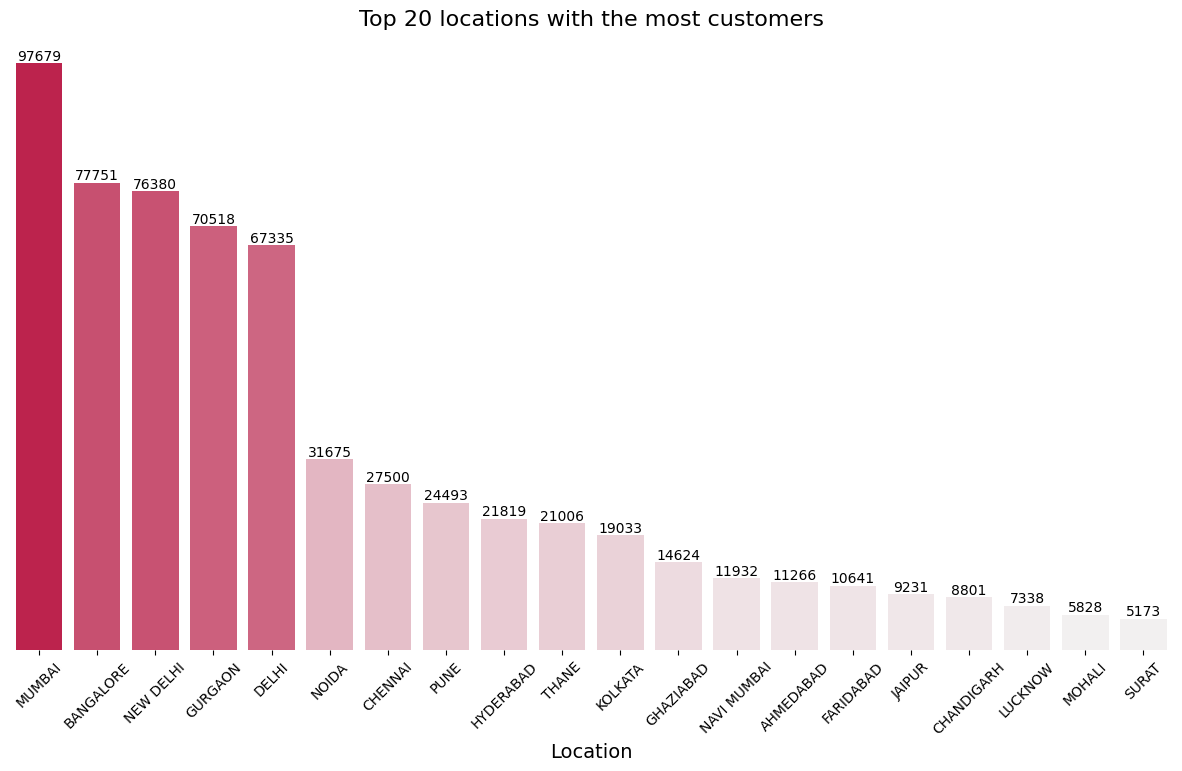

In [ ]:
# Top 20 địa điểm có nhiều khách hàng nhất

top_20_locations = df3['cust_location'].value_counts().nlargest(20)

# Chỉnh màu
cmap = sns.light_palette("#D50A41", as_cmap=True)
norm = plt.Normalize(top_20_locations.min(), top_20_locations.max())
colors = cmap(norm(top_20_locations.values))

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_20_locations.index, y=top_20_locations.values, palette=colors)

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xóa khung trục
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Xóa các dấu vết của các trục
# ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
# ax.yaxis.set_tick_params(width=0)

plt.title('Top 20 locations with the most customers', fontsize=16)
plt.xlabel('Location', fontsize=14)
# plt.ylabel('The number of customers', fontsize=14)

plt.xticks(rotation=45)

plt.show()

Nhìn chung phần lớn các giao dịch đều thuộc những thành phố lớn của Ấn Độ. Ngoài việc đây là thành phố lớn tập trung đông dân thì việc sử dụng giao dịch ngân hàng cũng phổ biến hơn tại các khu vực này.

Vì vậy, để kích cầu người dân sử dụng giao dịch ngân hàng nhiều hơn thì cần chính phủ phối hợp với nhà nước để người dân ở các tỉnh/thành phố khác mở tài khoản hoặc thực hiện giao dịch nhiều hơn bằng các chiến dịch reference cho người dùng cũ và người dùng mới hoặc phối hợp với các nhãn hàng khác tặng các voucher cho người dùng của họ khi sử dụng các sản phẩm của ngân hàng.

#### Total transaction amount by date

<ipython-input-34-5c913db4e076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['transaction_date'] = pd.to_datetime(df3['transaction_date'], format='%d/%m/%Y')


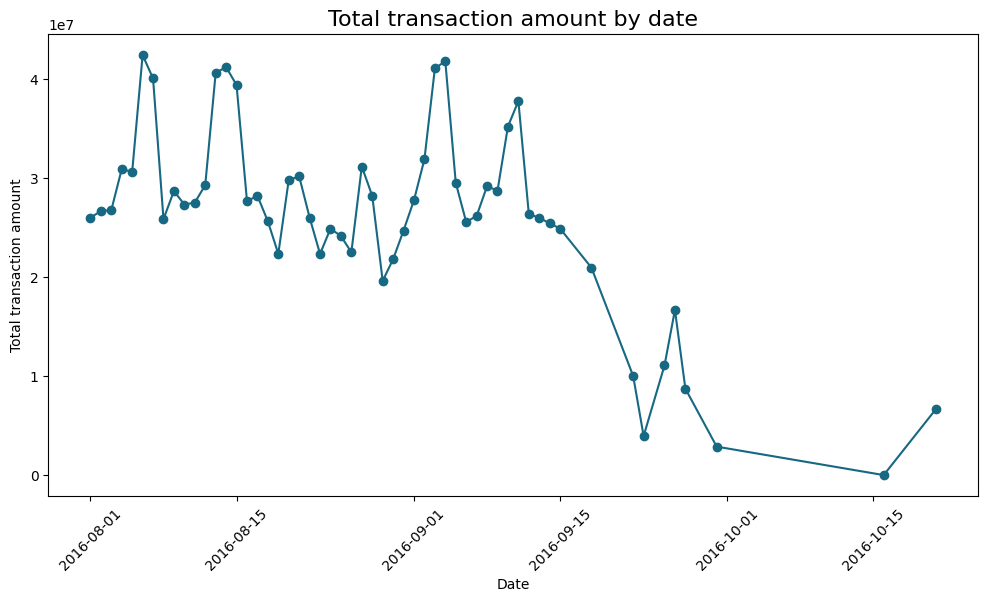

In [ ]:
# Tổng số tiền giao dịch theo ngày

df3['transaction_date'] = pd.to_datetime(df3['transaction_date'], format='%d/%m/%Y')

total_transaction_by_date = df3.groupby('transaction_date')['transaction_amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_transaction_by_date.index, total_transaction_by_date.values, marker='o', linestyle='-', color='#176882')

plt.title('Total transaction amount by date', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total transaction amount')

plt.xticks(rotation=45)

plt.show()

**Nhận Xét**
- Xu hướng ban đầu: Từ đầu tháng 8 đến giữa tháng 9, tổng số tiền giao dịch có xu hướng tăng cao và dao động mạnh với nhiều đỉnh và đáy.
- Từ khoảng giữa tháng 9, tổng số tiền giao dịch giảm mạnh và tiếp tục giảm đến đầu tháng 10.
- Cuối tháng 10, có một sự hồi phục nhẹ trong tổng số tiền giao dịch, nhưng vẫn thấp hơn nhiều so với mức trước đó.

#### Number of transactions per hour of the day

<ipython-input-35-0ce5417dace4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transactioncount_by_hour.index, y=transactioncount_by_hour.values, palette=colors)
<ipython-input-35-0ce5417dace4>:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=transactioncount_by_hour.index, y=transactioncount_by_hour.values, palette=colors)


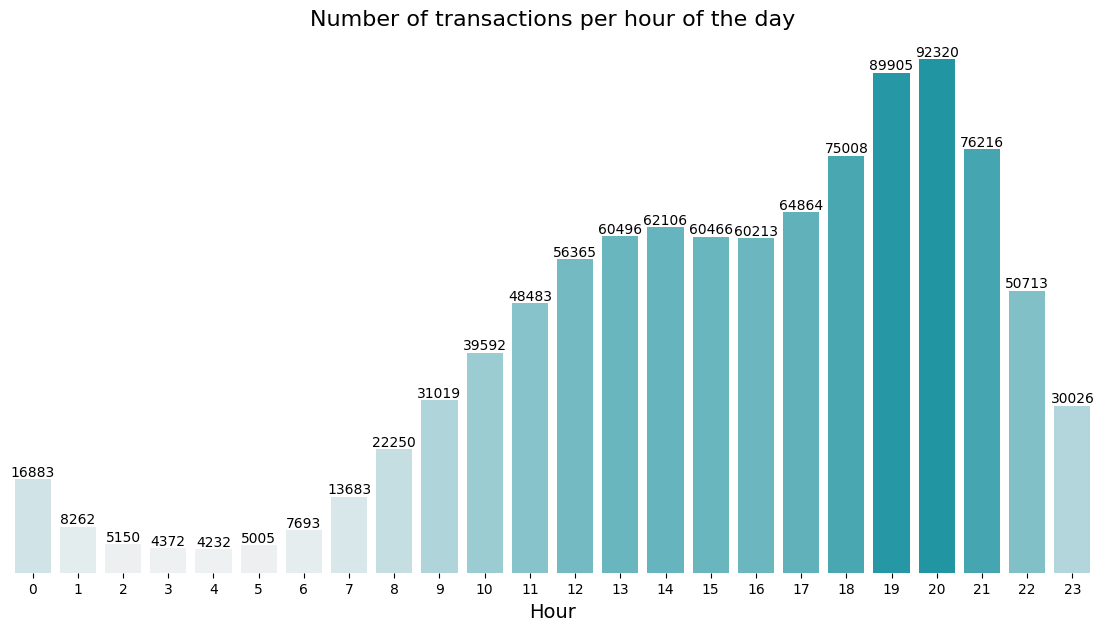

In [ ]:
# Tính số lượng giao dịch theo từng giờ trong ngày: để phân tích thời gian phổ biến nhất mà các giao dịch diễn ra

transactioncount_by_hour = df3['transaction_hour'].value_counts().sort_index()

# Chỉnh màu
cmap = sns.light_palette("#0BA6B7", as_cmap=True)
norm = plt.Normalize(transactioncount_by_hour.min(), transactioncount_by_hour.max())
colors = cmap(norm(transactioncount_by_hour.values))

# Vẽ
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=transactioncount_by_hour.index, y=transactioncount_by_hour.values, palette=colors)

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xóa khung trục
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Xóa các dấu vết của các trục
# ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
# ax.yaxis.set_tick_params(width=0)

plt.title('Number of transactions per hour of the day', fontsize=16)
plt.xlabel('Hour', fontsize=14)
#plt.ylabel('Number of transactions', fontsize=14)

# Hiển thị biểu đồ
plt.show()


Giờ cao điểm mà người dùng thực hiện các khoản giao dịch của mình nằm trong khoảng từ 12h - 22h, đỉnh điểm là trong khung giờ từ 18-21h.

=> Do đó, ngân hàng nên chú trong duy trì dịch vụ chuyển tiền trong khung giờ này luôn đạt tình trạng tốt nhất có thể để tránh tình trạng xuất hiện nhiều giao dịch lỗi hoặc bị tắc nghẽn các cổng giao dịch.

=> Khung giờ thích hợp nhất để bảo trì hệ thống của ngân hàng nên được diễn ra từ 0h - 6h.

#### Percentage of transactions by gender

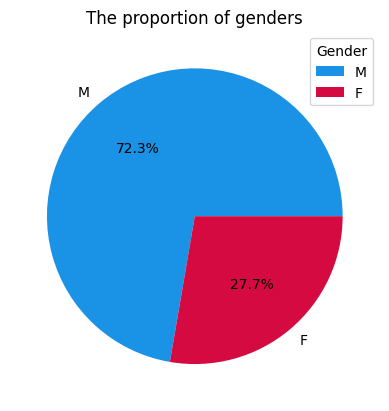

In [ ]:
# Tỷ lệ phần trăm số lượng giao dịch theo giới tính: xem giới tính nào có xu hướng giao dịch nhiều hơn

gender_counts = df3['cust_gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#1A92E5','#D50A41'])
plt.legend(title = "Gender")
plt.title("The proportion of genders")

plt.show()

#### Number of customers by money range and gender

<ipython-input-37-47ba86f38c1c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['money_range'] = pd.cut(df3['cust_account_balance'], bins=bins, labels=labels, right=False)
<ipython-input-37-47ba86f38c1c>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df3.groupby(['money_range', 'cust_gender']).size().unstack().fillna(0)


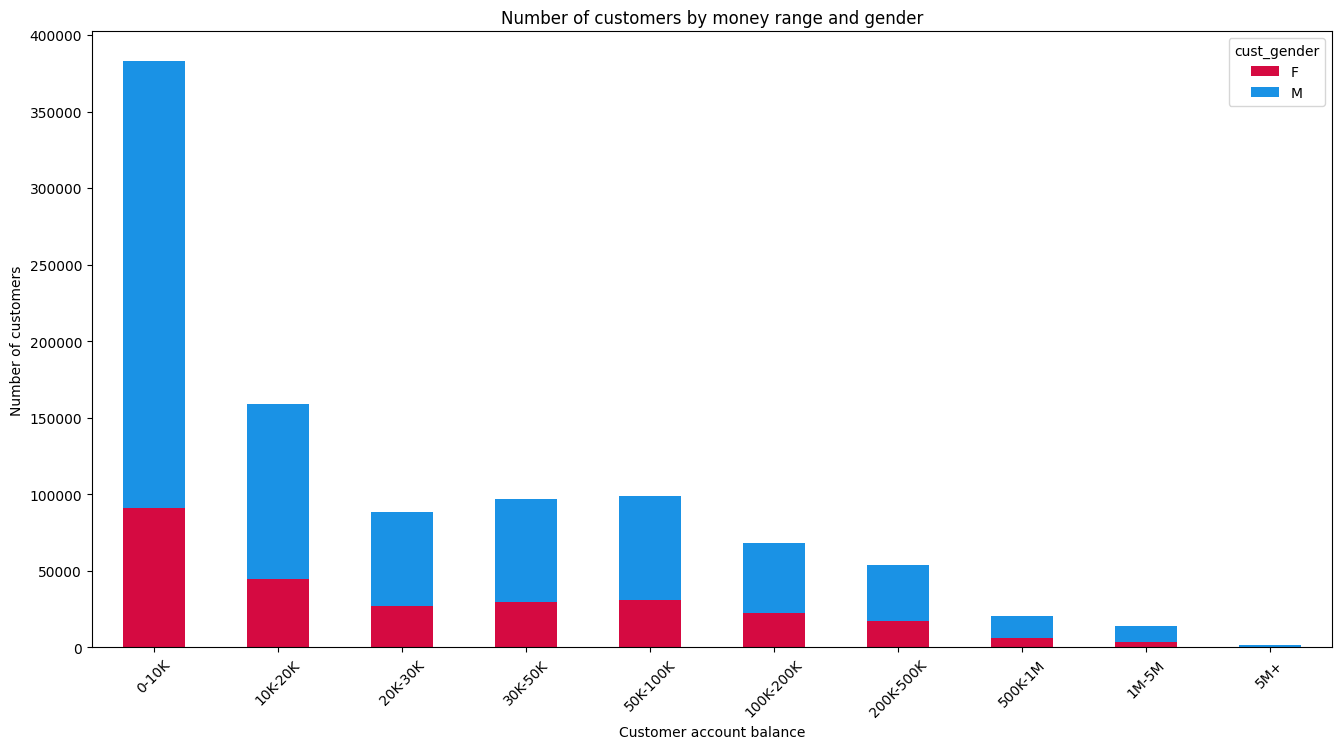

In [ ]:
# Số lượng khách hàng theo khoảng tiền và giới tính

bins = [0, 10000, 20000, 30000, 50000, 100000, 200000, 500000, 1000000, 5000000, 115035495.1]
labels = ['0-10K', '10K-20K', '20K-30K', '30K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '1M-5M', '5M+']

# Tạo cột cho khoảng tiền
df3['money_range'] = pd.cut(df3['cust_account_balance'], bins=bins, labels=labels, right=False)

# Tính số lượng khách hàng trong mỗi khoảng tiền và giới tính
counts = df3.groupby(['money_range', 'cust_gender']).size().unstack().fillna(0)

# Vẽ biểu đồ cột xếp chồng
counts.plot(kind='bar', stacked=True, figsize=(16, 8), color=['#D50A41','#1A92E5'])

plt.title('Number of customers by money range and gender')
plt.xlabel('Customer account balance')
plt.ylabel('Number of customers')

plt.xticks(rotation=45)

plt.show()


Phần lớn khách hàng của ngân hàng này là Male, điều này phụ thuộc nhiều vào yếu tố nhân khẩu học của Ấn Độ. Có một vài lí do dẫn đến sự phân hóa rõ rệt này:
- Văn hóa & xã hội: Trong một số khu vực, truyền thống và văn hóa của xã hội giới hạn quyền hạn của phụ nữ bao gồm cả việc quản lý tài chính.
- Tài nguyên: Một số vùng nông thôn vẫn chưa phổ biến việc giao dịch bằng ngân hàng nên phụ nữ ở các khu vực này có thể đối mặt với những khó khăn về công nghệ và cách tiếp cận với các dịch vụ ngân hàng.
- Khả năng tài chính: có thể ở Ấn Độ, phụ nữ không tạo ra thu nhập cao bằng những người đàn ông nên không có nhu cầu sử dụng các dịch vụ ngân hàng nhiều.

#### The percentage of transactions by age group

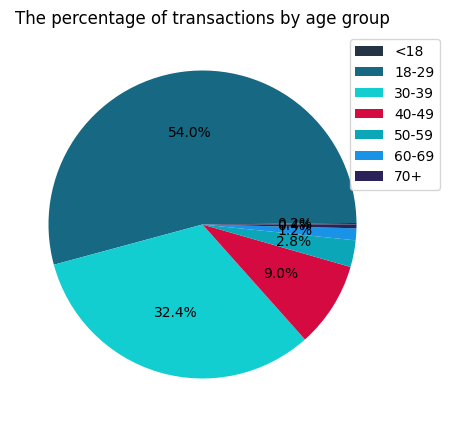

In [ ]:
# Phần trăm số lượng giao dịch theo nhóm tuổi
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

age_groups = pd.cut(df3['cust_age'], bins=bins, labels=labels, right=False)
transactioncount_by_age_group = age_groups.value_counts().sort_index()

colors = ['#243444', '#176882', '#13CED1', '#D50A41', '#0BA6B7', '#1A92E5', '#2A2259']

plt.figure(figsize=(7, 5))

plt.pie(transactioncount_by_age_group.values, labels=None, autopct='%1.1f%%', colors=colors)
plt.legend(labels, loc = 'upper center', bbox_to_anchor = (1, 1))
plt.title("The percentage of transactions by age group")

plt.show()

#### The relationship between Customer account balance and Transaction amount (bỏ qua cái này)

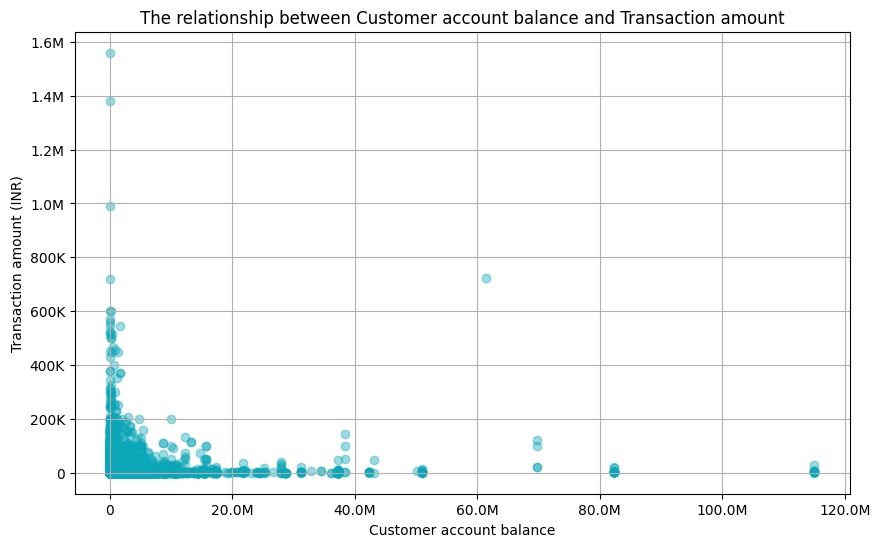

In [ ]:
# Thể hiện mối quan hệ giữa số dư tài khoản của khách hàng (cust_account_balance) và số tiền giao dịch (transaction_amount).

# Định dạng số tiền
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'{(x/1e6)}M'
    elif x >= 1e3:
        return f'{int(x/1e3)}K'
    else:
        return f'{int(x)}'

plt.figure(figsize=(10, 6))
plt.scatter(df3['cust_account_balance'], df3['transaction_amount'], color='#0BA6B7', alpha = 0.4)

plt.title('The relationship between Customer account balance and Transaction amount')
plt.xlabel('Customer account balance')
plt.ylabel('Transaction amount (INR)')

plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(True)
plt.show()

Biểu đồ này cho thấy hành vi giao dịch của 4 nhóm khách hàng:
- Cluster 0: nhóm khách hàng có số dư tài khoản rất thấp và không thực hiện giao dịch hoặc thực hiện rất ít
- cluster 1: nhóm khách hàng có số dư tài khoản từ thấp đến cao nhưng giao dịch rất ít
- cluster 2: nhóm khách hàng có số dư tài khoản và số tiền giao dịch thấp
- cluster 3: nhóm khách hàng có số dư tài khoản rất thấp đến trung bình nhưng thực hiện giao dịch với số tiền lớn

=> Chúng ta cần có những chiến dịch kích cầu tiêu dùng của các nhóm khách hàng thuộc cluster 1, 2; chiến dịch tri ân nhóm khách hàng cluster 3 để tạo loyal customer và thu hút việc giao dịch trở lại của những nhóm khách hàng thuộc cluster 0.

#### Number of transactions by hour of day and day of week

In [ ]:
# Số lượng giao dịch theo giờ trong ngày và ngày trong tuần

df3['day_of_week'] = df3['transaction_date'].dt.day_name()

# Tạo pivot table cho heatmap
heatmap_data = df3.pivot_table(values='transaction_amount', index='day_of_week', columns='transaction_hour', aggfunc='count', fill_value=0)

# Sắp xếp lại thứ tự của ngày trong tuần để hiển thị đúng
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

def integer_formatter(x, pos):
    return f'{int(x)}'

# Chỉnh màu
colors = ['#176882', '#13CED1', '#D50A41']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='', cbar_kws={'label': 'Number of transactions'}, annot_kws={"size": 10, "weight": "bold"})

ax.collections[0].colorbar.ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.title('Number of transactions by hour of day and day of week')
plt.xlabel('Hour of day')
plt.ylabel('Day of week')

plt.show()

<ipython-input-39-428374af24e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day_of_week'] = df3['transaction_date'].dt.day_name()


NameError: name 'LinearSegmentedColormap' is not defined

**Nhận xét**

Tổng quan:
Số lượng giao dịch bắt đầu tăng từ khoảng 8h sáng, đạt đỉnh vào buổi chiều tối, sau đó giảm dần sau 21h.
Các ngày cuối tuần (đặc biệt là Chủ Nhật) vẫn giữ được lượng giao dịch cao, với đỉnh điểm vào buổi tối.

Số Lượng Giao Dịch Theo Ngày:
+ Thứ Hai đến Thứ Sáu: Lượng giao dịch duy trì khá ổn định trong suốt tuần, với các ngày trong tuần có xu hướng tương tự nhau.
+ Thứ Bảy và Chủ Nhật: Mặc dù cuối tuần, lượng giao dịch vẫn khá cao, đặc biệt là vào các giờ cao điểm trong ngày.

Số Lượng Giao Dịch Theo Giờ Trong Ngày:
+ Giờ cao điểm: Khoảng từ 14h đến 21h là thời gian có lượng giao dịch cao nhất trong ngày. Đặc biệt, từ 18h đến 21h là khoảng thời gian cao điểm với số lượng giao dịch đạt đỉnh.
+ Giờ thấp điểm: Từ 0h đến 6h sáng là thời gian có số lượng giao dịch thấp nhất, điều này là bình thường vì đó là thời gian ngủ của mọi người.

In [ ]:
#Test thử xem thử các giao dịch vào lúc .. và ngày ..

def get_transactions_date(df, dayname, hour):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

    df['day_of_week'] = df['transaction_date'].dt.day_name()

    result = df[(df['day_of_week'] == dayname) & (df['transaction_hour'] == hour)]

    return result

# Lấy các giao dịch vào lúc 19h của ngày Chủ Nhật
get_transactions_date(df3, 'Tuesday', 14)

<ipython-input-42-5b1eab8085b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])
<ipython-input-42-5b1eab8085b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['transaction_date'].dt.day_name()


,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,cust_age,transaction_hour,cluster,money_range,day_of_week
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,22,14,0,10K-20K,Tuesday
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,59,14,2,0-10K,Tuesday
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,2016-08-02,142712,459.00,20,14,0,10K-20K,Tuesday
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,43,14,0,500K-1M,Tuesday
126,T127,C7785966,10/07/1991,M,GURGAON,122636.69,2016-08-09,143958,60.00,25,14,0,100K-200K,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028959,T1028960,C6616486,08/08/1993,F,MUMBAI,9806.81,2016-09-13,141612,200.00,23,14,0,0-10K,Tuesday
1028960,T1028961,C5525217,27/11/1983,M,VADODARA,90026.62,2016-09-13,140522,150.00,33,14,0,50K-100K,Tuesday
1029340,T1029341,C6166144,07/01/1989,M,MUMBAI,22968.41,2016-09-13,141256,480.00,27,14,0,20K-30K,Tuesday
1029341,T1029342,C4186472,29/03/1961,M,AHMEDABAD,75993.50,2016-09-13,141603,1032.00,55,14,0,50K-100K,Tuesday


In [ ]:
# TEST
print(df3['transaction_amount'].max())
print(df3['transaction_amount'].min())
print(df3['transaction_amount'].median())

print(df3['cust_account_balance'].max())
print(df3['cust_account_balance'].min())
print(df3['cust_account_balance'].median())


#df3[df3['transaction_amount'] == 1560034.99]

1560034.99
0.0
431.0
115035495.1
0.0
16006.3


In [ ]:
# prompt: tải file csv df3 về máy

from google.colab import files
df3.to_csv('df3.csv', index=False)
files.download('df3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>